<a href="https://colab.research.google.com/github/jabrio/EDEM_Exercises_Statistics_Python/blob/main/Entrega_PEP_Grupo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programación estadística en Python_Grupo 01
#####En este notebook, realizaremos los ejercicios de la asignatura de Programación estadística en Python de EDEM.

##TAREA 01: IMPORTAR UN DATASET DE KAGGLE Y DESCRIBIR SUS VARIABLES
####En esta primera tarea, deberemos descargar un archivo .csv de kaggle y describir sus variables, haciendo hincapié en su variable *Target*.



##Variables a evaluar:

1.   Análisis de la demanda: Meses.
2.   Análisis de la demanda: Perfil del usuario.
3.   Análisis de la demanda: Vías de reserva.
4.   Ratio de cancelación.
5.   Relación cancelación/antelación reserva efectuada.
6.   Relación perfil usuario/cancelación.
7.   Relación perfil usuario/reserva de parking.
8.   Relación perfil usuario/mes reserva.
9.   Relación tipo de hotel con cancelaciones de cliente




### PASO 0_IMPORTAR

In [ ]:
import os
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guadme/grupo_pep/main/booking_modified.csv")

In [ ]:
df.shape
df.head
df.tail

<bound method NDFrame.tail of         Unnamed: 0         hotel  ...  arrival_date_month_num  Arrival_date
0                0  Resort Hotel  ...                     7.0    2015-07-01
1                1  Resort Hotel  ...                     7.0    2015-07-01
2                2  Resort Hotel  ...                     7.0    2015-07-01
3                3  Resort Hotel  ...                     7.0    2015-07-01
4                4  Resort Hotel  ...                     7.0    2015-07-01
...            ...           ...  ...                     ...           ...
119385      119385    City Hotel  ...                     8.0    2017-08-30
119386      119386    City Hotel  ...                     8.0    2017-08-31
119387      119387    City Hotel  ...                     8.0    2017-08-31
119388      119388    City Hotel  ...                     8.0    2017-08-31
119389      119389    City Hotel  ...                     8.0    2017-08-29

[119390 rows x 35 columns]>

QUALITY CONTROL OK

**PASO 1. ANÁLISIS DE LA DEMANDA:MESES**

#####En este primer apartado, vamos a proceder al análisis de la demanda de hotel, en relación a lo meses del año. Así, veremos la época del año en la que se produce mayor número de reservas. Esta variable, la relacionaremos con la media y la desviación típica.

In [ ]:
df.groupby(["arrival_date_month"]).size()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
dtype: int64

#####Como no aparece ordenado por orden cronológico, procedemos a realizar esta operación.

In [ ]:
from pandas.api.types import CategoricalDtype

month_list=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
orden_meses= CategoricalDtype(categories=month_list, ordered=True)
df ["month_new"]=df.arrival_date_month.astype(orden_meses)

In [ ]:
df.groupby(["month_new"]).size()

month_new
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
dtype: int64

Text(0, 0.5, 'Frecuencia')

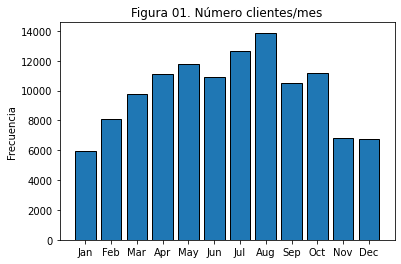

In [ ]:
month_new=df.groupby(["month_new"]).size()
month_bar=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_bar, month_new, edgecolor="Black")
plt.title("Figura 01. Número clientes/mes")
plt.ylabel("Frecuencia")

####Procedemos al análisis de variables cuantitativas.

In [ ]:
month_new.describe()

count       12.000000
mean      9949.166667
std       2521.813303
min       5929.000000
25%       7749.500000
50%      10723.500000
75%      11317.750000
max      13877.000000
dtype: float64

In [ ]:
M=month_new.mean()
S=month_new.std()
c1=M-S
c2=M+S

####Dibujamos la gráfica

Text(-0.5, 13200, 'n=119390')

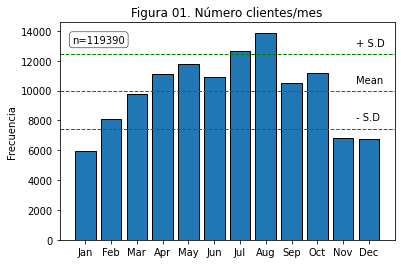

In [ ]:
plt.bar(month_bar, month_new, edgecolor="Black")
plt.title("Figura 01. Número clientes/mes")
plt.ylabel("Frecuencia")

plt.axhline(y=M,
            linewidth=1,
            linestyle="dashed",
            Color="red",
            label="Mean")

plt.axhline(y=M+S,
            linewidth=1,
            linestyle="dashed",
            Color="Green",
            label="SD")

plt.axhline(y=M-S,
            linewidth=1,
            linestyle="dashed",
            Color="Green",
            label="SD")

text1="Mean"
text2="+ S.D"
text3="- S.D"

plt.text(10.5,10500,text1)
plt.text(10.5,8000,text3)
plt.text(10.5,13000,text2)

n=month_new.sum()
props=dict(boxstyle="round", facecolor="white", lw=0.5)
text4="n=119390"
plt.text(-0.50,13200,text4, bbox=props)

**PASO 2. ANÁLISIS DE LA DEMANDA:PERFIL USUARIO**

#####Para definir el perfil de usuario, clasificaremos, según el gasto realizado en el hotel (adr), 3 tipologías de cliente:


*   Low customer
*   Average customer
*   High customer


In [ ]:
df.groupby(["adr"]).size()

adr
-6.38          1
 0.00       1959
 0.26          1
 0.50          1
 1.00         15
            ... 
 450.00        1
 451.50        1
 508.00        1
 510.00        1
 5400.00       1
Length: 8879, dtype: int64

(array([8.825e+03, 3.300e+01, 8.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 3.7630e+02, 7.5160e+02, 1.1269e+03, 1.5022e+03,
        1.8775e+03, 2.2528e+03, 2.6281e+03, 3.0034e+03, 3.3787e+03,
        3.7540e+03]),
 <a list of 10 Patch objects>)

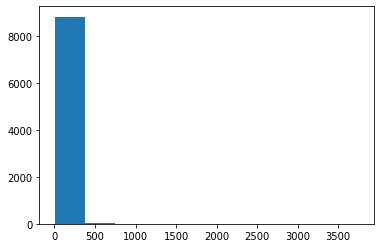

In [ ]:
adr.describe()
plt.hist(adr)

####Eliminaremos los valores de 0 al no ser representativos. Además, como podemos ver, existe un valor muy alejado del resto que suprimiremos.

In [ ]:
df ["Spending"]=df.adr.replace((0,5400),np.nan)
df.groupby(["Spending"]).size()


Spending
-6.38       1
 0.26       1
 0.50       1
 1.00      15
 1.29       1
           ..
 437.00     1
 450.00     1
 451.50     1
 508.00     1
 510.00     1
Length: 8877, dtype: int64

In [ ]:
df_01=df.Spending.dropna()

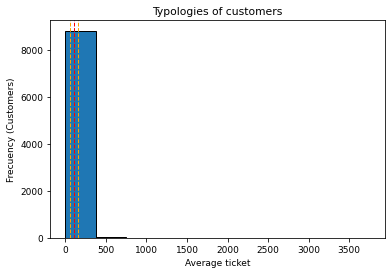

In [ ]:

A=df.groupby(["Spending"]).size()
plt.hist(A,edgecolor="Black")
plt.title("Typologies of customers")
plt.xlabel("Average ticket")
plt.ylabel("Frecuency (Customers)")
M1=df.Spending.mean()
S1=df.Spending.std()

c3=M1-S1
c4=M1+S1

plt.axvline(x=M1,
            linewidth=1,
            linestyle="dashed",
            Color="red",
            label="Mean")

plt.axvline(x=c3,
            linewidth=1,
            linestyle="dashed",
            Color="Orange",
            label="SD")

plt.axvline(x=c4,
            linewidth=1,
            linestyle="dashed",
            Color="Orange",
            label="SD")

#####Por tanto, c3 y c4 serán los puntos de corte que nos ayudarán a clasificar los distintos tipos de cliente.

In [ ]:
df.loc[(df["Spending"]<c3),"SP"]="Low customer"
df.loc[((df["Spending"]>=c3)& (df["Spending"]<c4)),"SP"]="Average customer"
df.loc[(df["Spending"]>=c4),"SP"]="High customer"
df.SP.dropna()

2         Average customer
3         Average customer
4         Average customer
5         Average customer
6         Average customer
                ...       
119385    Average customer
119386       High customer
119387       High customer
119388    Average customer
119389       High customer
Name: SP, Length: 117430, dtype: object

#####Establecemos los porcentajes y dibujamos la gráfica (teniendo en cuenta que hay que modificar el orden, ya que no nos interesa un orden alfabético).


SP
Average customer    87810
High customer       16497
Low customer        13123
dtype: int64
117430


Text(0.5, 1.0, 'Figure 02. Typologies of customers.')

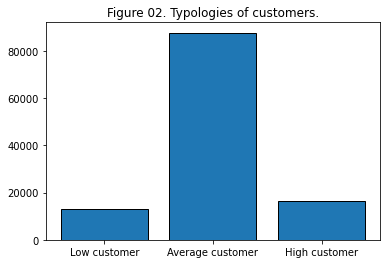

In [ ]:
mytable=df.groupby(["SP"]).size()
print(mytable)
n=mytable.sum()
print(n)
mytable_A=(mytable/n)*100
bar_list=["Low customer", "Average customer", "High customer"]
from pandas.api.types import CategoricalDtype
order_new= CategoricalDtype(categories=bar_list, ordered=True)
df["order_new"]=df.SP.astype(order_new)
order_new=df.groupby(["order_new"]).size()

plt.bar(bar_list,order_new,edgecolor="Black")
plt.title("Figure 02. Typologies of customers.")

**PASO 3. ANÁLISIS DE LA DEMANDA:VÍAS DE RESERVA.**

#####En este apartado, nos interesa saber cuál es el canal de captación de nuestros clientes:cómo nos contactan.

In [ ]:
df.groupby(["market_segment"]).size()
mytable_G=df.groupby(["market_segment"]).size()
nG=mytable_G.sum()
mytable_G1=(mytable_G/nG)*100
print(mytable_G1)
G2=df.groupby(["market_segment"]).size()
print(G2)

market_segment
Aviation          0.198509
Complementary     0.622330
Corporate         4.435045
Direct           10.558673
Groups           16.593517
Offline TA/TO    20.285619
Online TA        47.304632
Undefined         0.001675
dtype: float64
market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
dtype: int64


#####Debido al pequeño porcentaje de algunos de los nombres, agruparemos las minoritarias en un nuevo grupo denominado "others".

In [ ]:
df.loc[(df["market_segment"]=="Aviation"),"market_segment"]="Others"
df.loc[(df["market_segment"]=="Complementary"),"market_segment"]="Others"
df.loc[(df["market_segment"]=="Undefined"),"market_segment"]="Others"
B=df.groupby(["market_segment"]).size()
print(B)

market_segment
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Others             982
dtype: int64


#####Procedemos a dibujar la gráfica.


Text(0.5, 1.0, 'Figure 03. Market Segment')

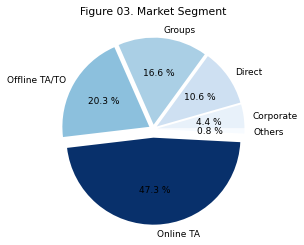

In [ ]:
from matplotlib import colors
from matplotlib import cm
normdata = colors.Normalize(min(B), max(B))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(B))
G2_List=["Corporate","Direct","Groups","Offline TA/TO","Online TA", "Others"]
desfase=(0.05,0.05,0.05,0.05,0.1,0.05)
plt.pie(B, labels=G2_List, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.title("Figure 03. Market Segment")

#####Ahora, analizaremos que tipología de cliente viene por cada tipo de vía.

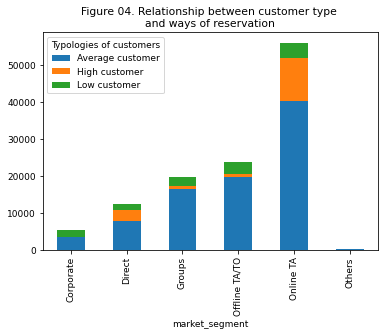

In [ ]:
df.rename(columns={"SP":"Typologies of customers"},inplace=True)
pd.crosstab(df.market_segment,columns=df["Typologies of customers"]). plot(kind="bar",title="Figure 04. Relationship between customer type \nand ways of reservation", stacked=True)

**PASO 4. RATIO DE CANCELACIÓN**

#### En este apartado, visualizaremos cual es el porcentaje total de cancelaciones que se producen:

In [ ]:
iscanceled_table = df.groupby (['is_canceled']).size()

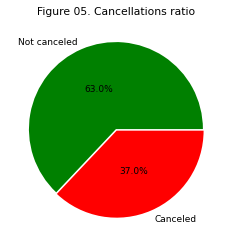

In [ ]:
plt.rcParams['font.size'] = 9.0
explode = ( 0, 0.02)
colors = ("green", "red")
labels = "Not canceled", "Canceled"
plt.pie(x=iscanceled_table, autopct="%.1f%%", labels=labels, pctdistance=0.5, explode=explode, colors=colors )
plt.title("Figure 05. Cancellations ratio")
plt.show();

**PASO 5. PORCENTAJE DE CANCELACIÓN/ANTELACIÓN RESERVA EFECTUADA**

En el apartado 5, comprobaremos ***gráfica*** y ***numéricamente*** si existe una relación entre el tiempo de antelación con el que se realiza la reserva y las cancelaciones que se producen en términos relativos (para lo que utilizaremos una función lambda que calcula esto a lo largo de la tabla).

Para ello, en primer lugar, establecemos rangos en el número de días de antelación con los que se produce la reserva:

In [ ]:
df.loc [(df ['lead_time'] <= 149) , "lead_time_c"] = "1 : < 150"
df.loc [ ((df["lead_time"]>=150) & (df['lead_time']<250)), "lead_time_c"] = '2 : 150 - 250 '
df.loc [ (df["lead_time"]>=250) ,"lead_time_c"] = '3: >250' 


Y categorizamos también **'is_canceled'** con: 

In [ ]:

df.loc[(df["is_canceled"]==0),"cancel"]="No"
df.loc[(df["is_canceled"]==1),"cancel"]="Yes"

Y a continuación realizamos un cruce de variables entre '***cancel***' y la nueva '***lead_time_c***'




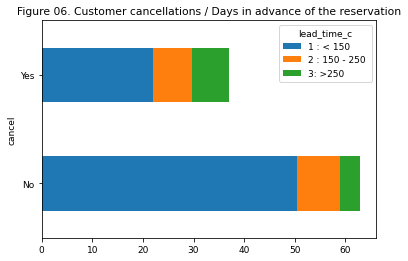

In [ ]:
lead_iscanceled_plot = pd.crosstab(df.cancel, columns=df['lead_time_c']).apply(lambda r: r/len(df) *100,
                                axis=1).plot(kind='barh', stacked= True, title = "Figure 06. Customer cancellations / Days in advance of the reservation")

#### Para verlo de manera **númerica**:

In [ ]:
lead_iscanceled_num = pd.crosstab(df.is_canceled, columns=df['lead_time_c']).apply(lambda r: r/len(df) *100, axis=1)

lead_iscanceled_num

lead_time_c,1 : < 150,2 : 150 - 250,3: >250
is_canceled,,,
0,50.368540,8.574420,4.015412
1,22.095653,7.509842,7.436134


**PASO 6. RELACIÓN PERFIL USUARIO/CANCELACIÓN**

#####En este apartado, analizaremos cómo afecta en las cancelación el perfil de cliente del que se trate.

In [ ]:
df.groupby(["is_canceled"]).size()

is_canceled
0    75166
1    44224
dtype: int64

####Cruzamos las variables para comprobar la relación. 
####Cómo anteriormente, ya hemos categorizado en una nueva columna la variable 'is_canceled' para convertirla en 'cancel', la utilizaremos ahora de nuevo.

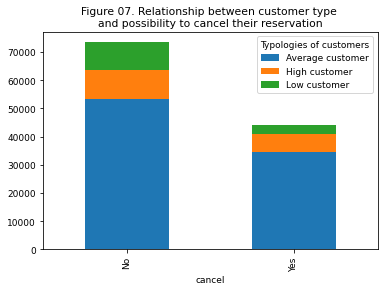

In [ ]:
pd.crosstab(df.cancel,columns=df["Typologies of customers"]). plot(kind="bar",title="Figure 07. Relationship between customer type \nand possibility to cancel their reservation", stacked=True)

**PASO 7. RELACIÓN PERFIL USUARIO/RESERVA PARKING**

#####Ahora, procedemos a analizar si interfiere el tipo de cliente que es en la reserva de plaza de aparcamiento.

In [ ]:
pk=df.groupby(["required_car_parking_spaces"]).size()
print(pk)

required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
dtype: int64


#####Para este ejercicio, simplificaremos que los valores númericos por encima de 1 son igual a 1, ya que solo nos interesa saber si reservan o no plaza.

In [ ]:
df ["Parking"]=df.required_car_parking_spaces.replace((2,3,8),1)
pk_=df.groupby(["Parking"]).size()
print(pk_)

Parking
0    111974
1      7416
dtype: int64


#####Dibujamos la gráfica.

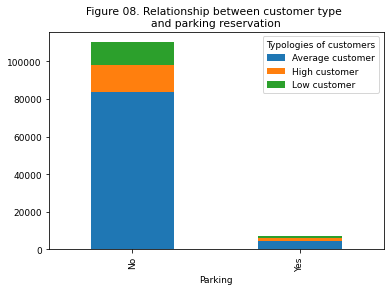

In [ ]:
df.loc[(df["Parking"]==0),"Parking"]="No"
df.loc[(df["Parking"]==1),"Parking"]="Yes"
pd.crosstab(df.Parking,columns=df["Typologies of customers"]). plot(kind="bar",title="Figure 08. Relationship between customer type \nand parking reservation", stacked=True)


**PASO 8. RELACIÓN PERFIL USUARIO/MES RESERVA**
#####Analizaremos qué epoca del año suele reservar cada tipología de cliente.

In [ ]:
df.rename(columns={"month_new":"Name_of_month"},inplace=True)


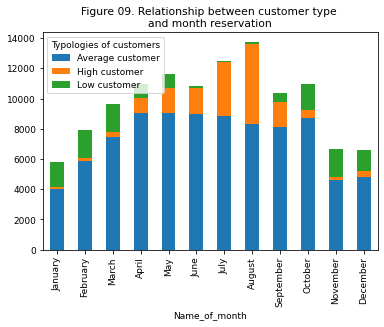

In [ ]:
df ["month_new"]=df.arrival_date_month.astype(orden_meses)
df.rename(columns={"month_new":"Name_of_month"},inplace=True)
pd.crosstab(df.Name_of_month,columns=df["Typologies of customers"]). plot(kind="bar",title="Figure 09. Relationship between customer type \nand month reservation", stacked=True)

**PASO 9. RELACIÓN TIPO DE HOTEL CON CANCELACIÓN DE CLIENTE**

Por último, investigaremos si existe relación entre el tipo de hotel que escoge el cliente y las cancelaciones.

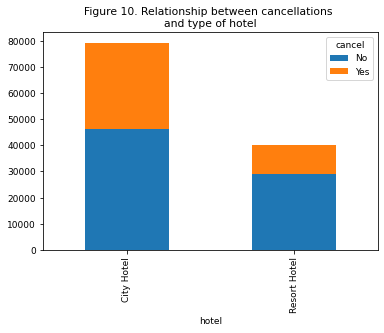

In [ ]:
pd.crosstab(df.hotel,columns=df["cancel"]). plot(kind="bar",title="Figure 10. Relationship between cancellations \nand type of hotel", stacked=True)

In [ ]:
pd.crosstab(df.hotel,columns=df["cancel"], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)


cancel,No,Yes,All
hotel,,,
City Hotel,38.720161,27.725940,66.446101
Resort Hotel,24.238211,9.315688,33.553899
All,62.958372,37.041628,100.000000
